In [1]:
# Jupyter Notebook 'Flowers - exercises'
# Goal: playing with pixel-based images, understand their
# properties, and at the same time learn how to work with
# matrix objects (numpy arrays) in Python
# You can add your own code to this notebook.

# By: H.J. Megens
# Where you can reach me: hendrik-jan.megens -at- wur.nl
# Last modified: 22 September 2016

import matplotlib.pyplot as plt # this is the general plotting library from matplotlib
from scipy import misc # module that provides some image manipulation functions
import numpy as np # numpy; note that the convention of importing is to create a sort of 'shortcut' name
import matplotlib.cm as cm # this module provides some color mapping needed for plotting gray or single color
%matplotlib inline

In [2]:
# Cropping is simply taking a square area smaller than the original
# image. Here is a little function that can do that.
def crop_sides(image,numpix=100):
  return image[numpix:-numpix,numpix:-numpix,:]


In [3]:
# Turning an RGB color image into grayscale can be achieved by taking
# the average of the three colors. 
# Bonus question: why doesn't this work:
# return (pixel[0] + pixel[1] + pixel[2])/3
def pixelAverage(pixel):
        return (pixel[0]/3 + pixel[1]/3 + pixel[2]/3)

# In practice, turning RGB into grayscale involves weighted average.
# This to compensate for the fact that the human eye is more sensitive
# to some colors than to others.
def weightedAverage(pixel):
        return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

def RGB_to_grayscale(image,method='pixelaverage'):
    # Let's turn an RGB image into a grayscale one

    # First we make a 'black', or 'empty' image of the same size:
    gray = np.zeros((image.shape[0],image.shape[1]))

    # Then we go through all rows...
    for rownum in range(sunflower.shape[0]):
        # ... and through all columns...
        for colnum in range(sunflower.shape[1]):
            # ... to calculate the grayscale value for each RGB pixel.
            if method == 'pixelaverage':
                gray[rownum][colnum] = pixelAverage(sunflower[rownum][colnum])
            else:
                gray[rownum][colnum] = weightedAverage(sunflower[rownum][colnum])
    return gray


In [4]:
def plot_RGB_histograms(image):
    # Obviously we can isolate all three color channels:
    blue = image[:,:,2]
    green = image[:,:,1]
    red = image[:,:,0]

    # ... and make histograms for each color
    blue_hist = np.histogram(blue.flatten(),normed=True)
    green_hist = np.histogram(green.flatten(),normed=True)
    red_hist = np.histogram(red.flatten(),normed=True)

    # Ok, now pay attention. It seems like we are creating THREE
    # different plots. But no, we are, each time, working from the 
    # SAME object! Which is the 'plt' object. We're just adding stuf
    # to it.
    # One additional point: the histogram data consists of TWO vectors.
    # The first is of length 10, and contains the actual values.
    # The second is of length 11, and contains the boundaries of the bins.
    # Hence the weird slicing....
    plt.plot(blue_hist[1][1:],blue_hist[0],color='blue')
    plt.plot(green_hist[1][1:],green_hist[0],color='green')
    plt.plot(red_hist[1][1:],red_hist[0],color='red')

    # and, as usual, explicitly direct to screen.
    plt.show()

In [5]:
# A tiny little subroutine to calculate Euclidean distance
# between two vectors. Beware: it takes two 1-dimensional 
# numpy arrays (vectors) OF SAME LENGTH as input

def euclid_dist(vect1,vect2):
  return np.sqrt(np.sum(np.square(vect1-vect2)))


# Flowers #

## Sunflowers and pansies ## 

For this exercise you can use much of the code provided in the **‘Flowers’** notebook. In fact, we have prepared a new notebook, this one, called **‘Flowers exercises’**, that has all the  functions you need already arranged (see above). Make sure to ‘activate’ the functions before you require them.  

All of the exercises are designed to be done in a purely interactive environment, and each exercise should never require more than 5 or 6 lines of code, most only 2 or 3. No loops should be necessary, but if any of you is adventurous enough to make more complicated code, please go ahead!

What is important is to keep your eye on the various functions. It will be pointed out when you need one of them, but also have a look at what it does.

Each question should be done in a single cell. If you want to make a new cell, press the ‘+’ symbol at the top of your notebook. You can move cells up or down using the arrows.

If we ask for a value(s) of an array, or another value that you need to calculate, make sure to explicitly ‘print’ the values or objects because otherwise they will not always be displayed when running the cells.

### Task 2: Images and arrays ###

**a)** Load in the sunflower image:

`image_sunflower_0076.png`

Plot the image. What are the dimensions of this image?

*For pointers how to do this, have a look at the original ‘Flowers’ notebook; specifically cells #2 (loading an image), #4 (shape of an image), #5 (plotting), and #6 (showing). Arrange everything in a single cell. When you do ‘`plt.show()`’, you have to close the image before you can continue.*

(500, 500, 3)


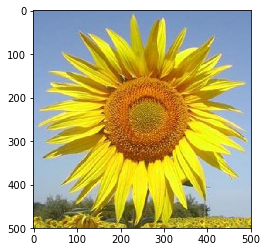

In [5]:
# Task 2a
sunflower = misc.imread("Flowers/image_sunflower_0076.png",mode='RGB')
print(sunflower.shape)
plt.imshow(sunflower)
plt.show()

**b)** What are the pixel values of the pixel at position [50,50], and the one at position [400,230]?

*Pointer: cell #7 of the original ‘Flowers’ notebook*

Check at this website whether the colors correspond to what you think they should be:
http://www.rapidtables.com/web/color/RGB_Color.htm

In [7]:
# Task 2b
print(sunflower[50,50,:])
print(sunflower[400,230,:])

[122 151 195]
[255 247  46]


c) Isolate the ‘blue’ channel, and display it. Does that pattern make sense?

Pointer: cell #15 of the original ‘Flowers’ notebook. Be sure for plotting to include the appropriate color mapping: ‘plt.imshow(blue, cmap = cm.Blues)’.

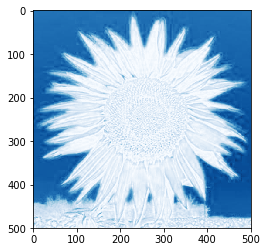

In [8]:
# Task 2c
blue = sunflower[:,:,2]
plt.imshow(blue, cmap = cm.Blues)
plt.show()

**d)** Grayscale 
- Calculate the grayscale value of pixels [400,10] and [470,10] by hand.

*Pointer: just return the RGB pixel value for these pixels as done in b), and take the average.*

- Create a grayscale image of the sunflower based on pixel averages, and display it. 

*Pointer: you can use the ‘RGB_to_grayscale’ function for that. It takes an RGB image as input, and an optional parameter ‘method’. The function returns a grayscale image.
gray = RGB_to_grayscale(sunflower,method='pixelaverage')
The ‘gray’ image can be displayed similar to cell #12 of the original ‘Flowers’ notebook (again, beware of this peculiar color mapping thing):
`plt.imshow(gray, cmap = cm.Greys_r)
plt.show()`*

- What are the dimensions of the grayscale image?

- Retrieve the pixel values of the grayscale image at locations: [400,10], [470,10]. Does that make sense when you consider the original and the grayscale images? What value would a black pixel be? And a white pixel?


(500, 500)
186.666666667
85.0


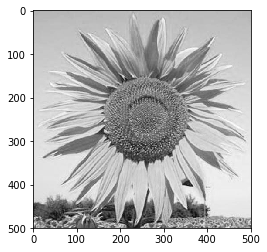

In [9]:
# Task 2d
gray = RGB_to_grayscale(sunflower,method='pixelaverage')
print(gray.shape)
print(gray[400,10])
print(gray[470,10])
plt.imshow(gray, cmap = cm.Greys_r)
plt.show()

**e)** Again, create a grayscale image of the sunflower, but now with weighted averages. You can do the same as in d), but now supply '`method=’weightedaverage`'. What are the values of these two pixels now?

(bonus: if you look at the function '`RGB_to_grayscale`', what would happen if you make a type and instead supply '`method=’weigtdavrge`'?

(500, 500)
183.659
95.034


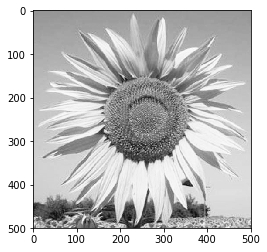

In [10]:
# Task 2e
gray = RGB_to_grayscale(sunflower,method='weightedaverage')
print(gray.shape)
print(gray[400,10])
print(gray[470,10])
plt.imshow(gray, cmap = cm.Greys_r)
plt.show()

### Task 3: Deriving features from image data: color histograms ###

**a)** Plot color histograms for all three channels. Explain the pattern. Remember: yellow is composed of green and red and has little to no blue. And what about that ‘blue spike’?

*Pointer: take the function '`plot_RGB_histograms`', which takes only one variable: an image.*

`plot_RGB_histograms(image)`

*Note that you can save images using the ‘disk’ symbol in the plot window. You need to close the plot window to continue.*

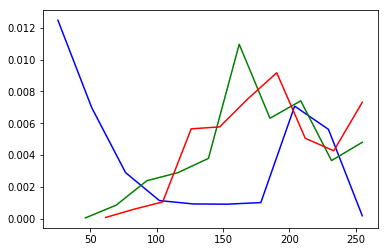

In [11]:
# Task 3a
plot_RGB_histograms(sunflower)

**b)** Crop the image (remove 100 pixels on all sides), and plot again. Now again make a color histogram plot. Explain the differences of this histogram with the previous one, based on that cropped image.

*Pointer: use the '`crop_sides`' function, which takes an image as input, and optional parameter of number of pixels to crop on all sides (default: 100). It returns a cropped image.*

`croppedsunflower = crop_sides(sunflower)`

*Making the histogram on the cropped image is done in the same way as in a).*

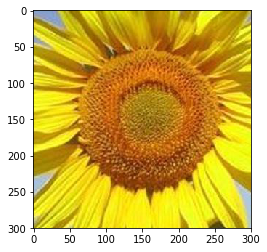

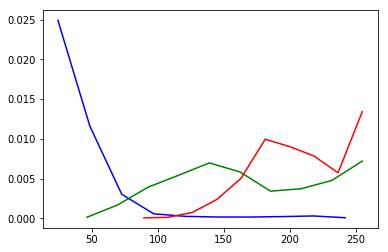

In [12]:
# Task 3b
croppedsunflower = crop_sides(sunflower)
plt.imshow(croppedsunflower)
plt.show()
plot_RGB_histograms(croppedsunflower)

**c)** Concatenate the color histograms into a single ‘feature vector’. How long is that vector? What is the highest value in the vector? Does that match with the plotted color histograms?

*Pointer: use the '`hist_all_colors`' function. It takes an image as input, and returns a vector.*

`sunflower_hist = hist_all_colors(sunflower)`

In [13]:
# Task 3c
sunflower_hist = hist_all_colors(sunflower)
print(len(sunflower_hist))
print(sunflower_hist)

30
[  8.05581395e-05   6.01302326e-04   1.05544186e-03   5.64706977e-03
   5.76837209e-03   7.55293023e-03   9.16762791e-03   5.05358140e-03
   4.26902326e-03   7.31572093e-03   5.20689655e-05   8.51724138e-04
   2.39120690e-03   2.88879310e-03   3.78948276e-03   1.09582759e-02
   6.31034483e-03   7.40672414e-03   3.65310345e-03   4.80172414e-03
   1.24676078e-02   6.97600000e-03   2.89913725e-03   1.14274510e-03
   9.28941176e-04   9.14980392e-04   1.01411765e-03   7.07247059e-03
   5.61333333e-03   1.86352941e-04]


**d)** now load the picture of a pansy (image_pansy_0179.png). Remember that the images are inside your working directory INSIDE the folder ‘Flowers’. Make sure to adjust the path accordingly!

Again, plot the color histogram. What are obvious differences between the histogram of the sunflower and that of the pansy?

*Pointer: again use the `plot_RGB_histograms` function.*

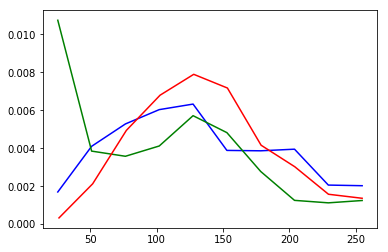

In [14]:
# Task 3d
pansy = misc.imread("Flowers/image_pansy_0179.png",mode='RGB')
plot_RGB_histograms(pansy)

**e)** Calculate the Euclidean distance between the arrays `[1,2,3,4]` and  `[2,2,5,3]`.
You could do this by turning these into numpy arrays and use the function '`euclid_dist`' that is given, which takes two numpy 1-d arrays (vectors). But you could in fact do this easily by hand too: take the sum of the square of the differences between the two vectors, and then take the square root of that.

https://en.wikipedia.org/wiki/Euclidean_distance

In [15]:
# Task 3e
a = np.array([1,2,3,4])
b = np.array([2,2,5,3])
print('%.3f' %(euclid_dist(a,b)))

# alternatively
from scipy.spatial import distance
print('%.3f' % distance.euclidean(a,b))

2.449
2.449


**f)** Calculate the Euclidean distance between the sunflower and the pansy histograms.

*Pointer: You should still have the vectorized color histogram of the sunflower, from **c)**. Make another one for the pansy and use these two vectors  to calculate the euclidean distance between the two images using the '`euclid_dist`'  function.*

`pansy_hist = hist_all_colors(pansy)`

`euclid_dist(sunflower_hist,pansy_hist)`

In [16]:
# Task 3f
pansy_hist = hist_all_colors(pansy)
euclid_dist(sunflower_hist,pansy_hist)

0.023623787285881468

**g)** You could extend this by making color histograms for other pictures, such as for a second pansy and/or a second sunflower. If you would calculate the Euclidean distance between two pansies, would that value be smaller or larger than any of the pansies to a sunflower?

*Pointer: you can use the '`euclid_dist_between_images`' function, it takes two images as input.*

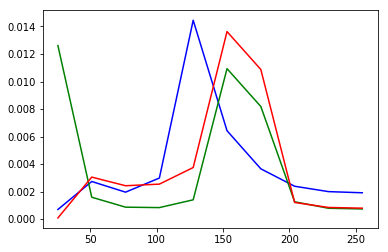

0.01854289146732075

In [17]:
# Task 3g
pansy2 = misc.imread("Flowers/image_pansy_0197.png",mode='RGB')
pansy2_hist = hist_all_colors(pansy2)
plot_RGB_histograms(pansy2)
euclid_dist(pansy_hist,pansy2_hist)

Further considerations: You could do the same by cropping the images so that you ‘zoom in’ on the flower more and leave more of the background out. Color histograms, for instance in conjunction with localizing items in a picture, are among the many features that can be used to do automated image analysis, such as, e.g., a plant classification system. Have a look at the last 2 cells of the original ‘Flowers’ notebook. 

If you are interested in image manipulation, Python is a fantastic language to start. It has a very powerful image analysis library (openCV, where ‘CV’ stands for ‘Computer Vision’). For some great free tutorials where you can explore the power of Python for image analysis, check out this website:
http://www.pyimagesearch.com/